In [1]:
import pandas as pd
from scipy.special import binom
from tqdm import tqdm
from itertools import combinations
from pathlib import Path
from collections import defaultdict

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import numpy as np
import matplotlib.pyplot as plt

get_ipython().run_line_magic("matplotlib", "inline")
font = {"weight": "normal", "size": 14, "family": "DejaVu Sans"}
plt.rc("text", usetex=True)
plt.rc("font", **font)
mpl.rc("text.latex", preamble=r"\usepackage{amsmath}")
def rec_dd():
    return defaultdict(rec_dd)
import json


In [2]:
benchmark_path = Path(
    "/home/gabrielathenes/Documents/study/HILARy/data_with_scripts/benchmark_on_synthetic_dataset"
)


In [3]:
def pairwise_evaluation(df, partition, ground_truth="simulations"):
    TP = 0
    P = binom(df.groupby([ground_truth]).size(), 2).sum()
    TP_FP = binom(df.groupby([partition]).size(), 2).sum()
    for _, family in tqdm(df.groupby([ground_truth]), disable=True):
        for r1, r2 in combinations(family[partition], 2):
            if r1 == r2:
                TP += 1
    if TP_FP == 0:
        return 0.0, 1.0
    elif P == 0:
        return None, None
    return (
        TP / P,
        TP / TP_FP,
    )  # sensitivity, precision

def entropy(dfGrouped):
    fs = dfGrouped.size()
    fs = fs / sum(fs)
    return sum(fs * np.log2(fs))


def variation_of_info(df, result):
    VI = (
        entropy(df.groupby(["simulations"]))
        + entropy(df.groupby([result]))
        - 2 * entropy(df.groupby([result, "simulations"]))
    )
    return VI


In [4]:
metric_dict=rec_dd()
for set in [1,2,3,4,5]:
    prec_list=[]
    sens_list=[]
    var_list=[]
    for l in range(15,48,3):
        dataframe=pd.DataFrame()
        for model in [f"hilary-full-1-2-0","scoper-cdr3","scoper-mutations"]:
            print(set,l,model)
            if model.startswith("hilary-full"):
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/inferred_full_method_families{set}_1e4_ppost326651_mut326713_cdr3l{l}.csv"
                    ),
                )
                df["sequence_id"]=df["sequence_id"].str.strip("-igh")
                df.set_index("sequence_id")
                dataframe[model] = df["family"]
                dataframe["simulations"] = df["FAMILY"]

            elif model.startswith("hilary-CDR3-1-2-0"):
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/inferred_cdr3_based_families{set}_1e4_ppost326651_mut326713_cdr3l{l}.csv"
                    ),
                )
                df["sequence_id"]=df["sequence_id"].str.strip("-igh")
                df.set_index("sequence_id")
                dataframe[model] = df["cdr3_based_family"]
            elif model.startswith("partis"):
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/families{set}_1e4_ppost326651_mut326713_cdr3l{l}_partis-pass.csv"
                    ),
                    index_col="sequence_id",
                )

                dataframe[model]=df["clone_id"]
            elif model.startswith("scoper-cdr3"):
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/families{set}_1e4_ppost326651_mut326713_cdr3l{l}_scoper-pass.csv"
                    ),
                    index_col="ID",
                )
                dataframe[model] = df["CLONE"]

            elif model.startswith("scoper-mutations"):
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/families{set}_1e4_ppost326651_mut326713_cdr3l{l}.csv.gz-scoper-vj-pass.csv"
                    ),
                    index_col="sequence_id",
                )
                dataframe[model] = df["clone_id"]

            elif model.startswith("alignment"):
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/families{set}_1e4_ppost326651_mut326713_cdr3l{l}_af-pass.csv"
                    ),
                    index_col="ID",
                    sep=",",
                )

                dataframe[model] = df["CLONE"]
            sensitivity,precision=pairwise_evaluation(dataframe,model)
            varinfo = variation_of_info(dataframe,model)
            metric_dict[model]["precision"][l][set]=precision
            metric_dict[model]["sensitivity"][l][set]=sensitivity
            metric_dict[model]["variation_of_info"][l][set]=varinfo


1 15 hilary-full-1-2-0
1 15 scoper-cdr3
1 15 scoper-mutations
1 18 hilary-full-1-2-0
1 18 scoper-cdr3
1 18 scoper-mutations
1 21 hilary-full-1-2-0
1 21 scoper-cdr3
1 21 scoper-mutations
1 24 hilary-full-1-2-0
1 24 scoper-cdr3
1 24 scoper-mutations
1 27 hilary-full-1-2-0
1 27 scoper-cdr3
1 27 scoper-mutations
1 30 hilary-full-1-2-0
1 30 scoper-cdr3
1 30 scoper-mutations
1 33 hilary-full-1-2-0
1 33 scoper-cdr3
1 33 scoper-mutations
1 36 hilary-full-1-2-0
1 36 scoper-cdr3
1 36 scoper-mutations
1 39 hilary-full-1-2-0
1 39 scoper-cdr3
1 39 scoper-mutations
1 42 hilary-full-1-2-0
1 42 scoper-cdr3
1 42 scoper-mutations
1 45 hilary-full-1-2-0
1 45 scoper-cdr3
1 45 scoper-mutations
2 15 hilary-full-1-2-0
2 15 scoper-cdr3
2 15 scoper-mutations
2 18 hilary-full-1-2-0
2 18 scoper-cdr3
2 18 scoper-mutations
2 21 hilary-full-1-2-0
2 21 scoper-cdr3
2 21 scoper-mutations
2 24 hilary-full-1-2-0
2 24 scoper-cdr3
2 24 scoper-mutations
2 27 hilary-full-1-2-0
2 27 scoper-cdr3
2 27 scoper-mutations
2 30 hil

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import json


# Plot

/tmp/ipykernel_2066635/2878664211.py:6: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax0.set_xscale("log", basex=10)
/tmp/ipykernel_2066635/2878664211.py:7: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax0.set_yscale("log", basey=60)


scoper-cdr3
scoper-mutations
hilary-full
scoper-cdr3
hilary-full-1-2-0
scoper-mutations


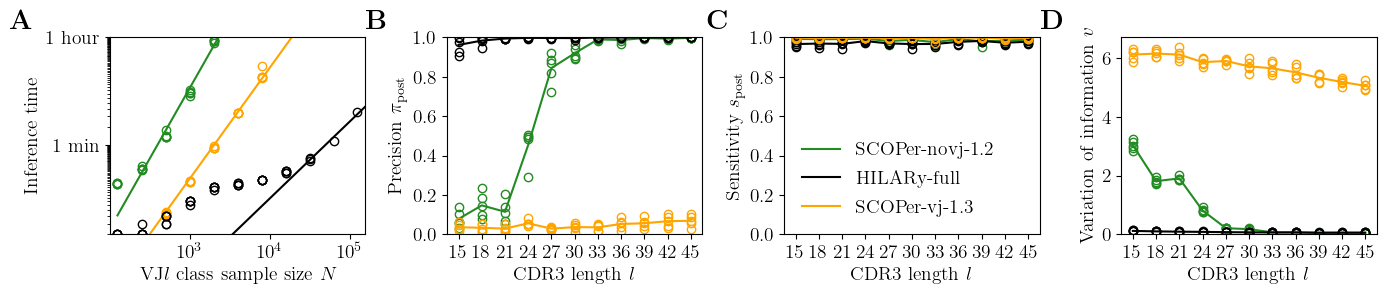

In [14]:
ls = np.arange(15, 45 + 3, 3)
fig = plt.figure(figsize=(14, 3))
ax0 = fig.add_subplot(141)
ax0.set_ylabel("Inference time")
ax0.set_xlabel("VJ$l$ class sample size $N$")
ax0.set_xscale("log", basex=10)
ax0.set_yscale("log", basey=60)
ax0.set_yticks([1 / 60, 1])
ax0.set_yticklabels(["1 min", "1 hour"])
ax0.set_xticks([10e2, 10e3, 10e4, 10e5])
ax0.set_ylim(ymin=2.0 / 3600, ymax=1)
ax0.set_xlim(xmin=100, xmax=1.2 * 2**17)

with open(
    "/home/gabrielathenes/Documents/study/HILARy/data_with_scripts/benchmark_on_synthetic_dataset/computation_time/times.json",
) as json_file:
    times = json.load(json_file)

limits = {
    "scoper-cdr3": 250,
    "hilary-full": 2e4,
    "scoper-mutations":250,

}

colors = {
    "scoper-cdr3": "forestgreen",
    "scoper-mutations":"orange",
    "hilary-full": "k",
}
for i, model in enumerate(colors):
    print(model)
    size_list = []
    time_list = []
    limit = limits[model]
    for size in times[model]:
        for time in times[model][size]:
            size_list.append(float(size))
            time_list.append(float(time))
        y = np.array(times[model][size]).astype(float) / 3600
        x = [float(size)] * len(y)
        ax0.plot(
            x,
            y,
            "o",
            fillstyle="none",
            color=colors[model],
        )
    log_sizes = np.log(np.array(size_list))
    log_times = np.log(np.array(time_list))
    uniqueSizes = np.array(list(dict.fromkeys(size_list)) + [200000])
    a = np.polyfit(
        log_sizes[log_sizes >= np.log(limit)], log_times[log_sizes >= np.log(limit)], 1
    )

    ax0.plot(
        uniqueSizes, uniqueSizes ** a[0] * np.exp(a[1]) / 3600, "-", color=colors[model]
    )


ax1 = fig.add_subplot(142)
ax1.set_ylabel(r"Precision $\pi_{\rm post}$")
ax1.set_xlabel(r"CDR3 length $l$")
ax2 = fig.add_subplot(143)
ax2.set_ylabel(r"Sensitivity $s_{\rm post}$")
ax2.set_xlabel(r"CDR3 length $l$")
ax3 = fig.add_subplot(144)
ax3.set_ylabel(r"Variation of information $v$")
ax3.set_xlabel(r"CDR3 length $l$")
axes = [ax1, ax2, ax3]

"-------------------------------------------------------------------------------------------------------------------"

colors = {
    "scoper-cdr3": "forestgreen",
    "hilary-full-1-2-0": "k",
    "scoper-mutations": "orange",
}

for model in colors:
    print(model)
    if model == "hilary-full-1-2-0":
        label="HILARy-full"
    elif model == "hilary-CDR3-1-2-0":
        label = "HILARy-CDR3"
    elif model=="scoper-cdr3":
        label="SCOPer-novj-1.2"
    elif model=="scoper-mutations" :
        label="SCOPer-vj-1.3"
    for i, metric in enumerate(metric_dict[model]):
        for l in metric_dict[model][metric]:
            y = list(metric_dict[model][metric][l].values())
            x = [l] * len(y)
            axes[i].plot(
                x,
                y,
                "o",
                fillstyle="none",
                color=colors[model],
            )
        lengths = []
        averages = []
        for length in metric_dict[model][metric]:
            lengths.append(length)
            averages.append(np.mean(list(metric_dict[model][metric][length].values())))
        axes[i].plot(
            lengths,
            averages,
            color=colors[model],
            label=label,
        )

ax1.set_xticks(ls)
ax1.set_xticklabels(ls)
ax2.set_xticks(ls)
ax2.set_xticklabels(ls)
ax3.set_xticks(ls)
ax3.set_xticklabels(ls)

"-------------------------------------------------------------------------------------------------------"

ax1.set_ylim(bottom=0, top=1)

ax2.set_ylim(bottom=0,top=1)

ax3.set_ylim(bottom=0)
ax2.legend(frameon=False)
plt.tight_layout(pad=1.2)
plt.text(-130, 7, r"\bf{A}", rotation=0, wrap=True, fontsize=20)
plt.text(-84, 7, r"\bf{B}", rotation=0, wrap=True, fontsize=20)
plt.text(
    -40, 7, r"\bf{C}", rotation=0, wrap=True, fontsize=20
)
plt.text(3.1, 7, r"\bf{D}", rotation=0, wrap=True, fontsize=20)
# fig.savefig('new_figures/figure4.pdf',bbox_inches='tight',dpi=1000)
plt.savefig(
    "/home/gabrielathenes/Dropbox/Natanael_lineages_inference/revisions_2024_01_26/figures/si_figureXXX.pdf",
    bbox_inches="tight",
)
plt.show()
